In [1]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image

c:\Users\bezgr\STUDY\HSE\Course 2\Coursework\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
clip_model = CLIPModel.from_pretrained("wkcn/TinyCLIP-ViT-61M-32-Text-29M-LAION400M")
clip_processor = CLIPProcessor.from_pretrained("wkcn/TinyCLIP-ViT-61M-32-Text-29M-LAION400M")

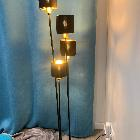

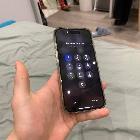

['телефон']


In [119]:
text = ['телефон']

images = [Image.open("smart_gallery/media/preview/preview_541b1e9a-6ab2-4b3f-85d9-a61df25f6e03.jpg"),
          Image.open("smart_gallery/media/preview/preview_659b6d05-976b-4e73-8e0b-8758b3570bef.jpg"),]

for i in images:
    display(i)
print(text)

In [120]:
inputs = clip_processor(text=text, images=images, return_tensors="pt", padding=True)
with torch.no_grad():
    outputs = clip_model(**inputs)
image_embeds = outputs.image_embeds
text_embeds = outputs.text_embeds

In [121]:
similarity = torch.matmul(text_embeds, image_embeds.T)
print(similarity, similarity > 0.25)

tensor([[0.2072, 0.2503]]) tensor([[False,  True]])
